# PyTorch Workflow

1. Data - Preparation and Loading
2. Model - Building
3. Model - Fitting
4. Model - Predictions and Evaluation
5. Model - Saving and Loading
6. Summarization

In [1]:
import torch
from torch import nn # Contains PyTorch's building blocks for Neural Networks
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.4.0+cu121'

## 1. Data - Preparation and Loading

Types of data:

* Excel spreadsheet
* Images
* Videos
* Audio
* DNA
* Text

Main ML steps:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.


**Parameter:** It's what a model learns.

### Create data using Linear Regression formula

#### Create **known** parameters

These are the values that we are going to try to obtain:

In [3]:
weight = 0.7
bias = 0.3

In [4]:
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias # Linear Regression

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Splitting data into training and test set

In [5]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(8, 6))
  plt.scatter(train_data, train_labels, c="blue", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="green", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="red", s=4, label="Predicitons")

  plt.legend(prop={"size": 14})

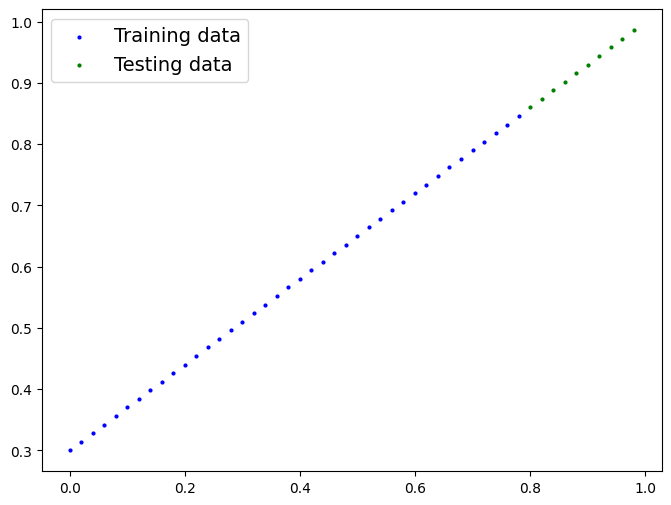

In [7]:
plot_predictions()

## 2. Build a Model

Linear Regression model example:

In [10]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # Linear Regression formula

### PyTorch model building essentials

* torch.nn - Building blocks for computational graphs (neural networks)
* torch.nn.Parameter - What parameters should our model try and learn. PyTorch layer takes care for us
* torch.nn.Module - Base class for all network modules (override forward method)
* toch.optim - Optimizations that help with gradient descent

### Checking the contents of our PyTorch model

We can use `.parameters()` to check out our model parameters.

In [12]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
list(model_0.state_dict())

['weights', 'bias']

## Making prediction using `torch.inference_mode()`

This turns off the gradient tracking. Essentially PyTorch disables tools that are only used during training consenquently boosts performance.
We will see how well it predicts `y_test` based on `X_test`.

In [19]:
with torch.inference_mode(): # Context manager
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [20]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

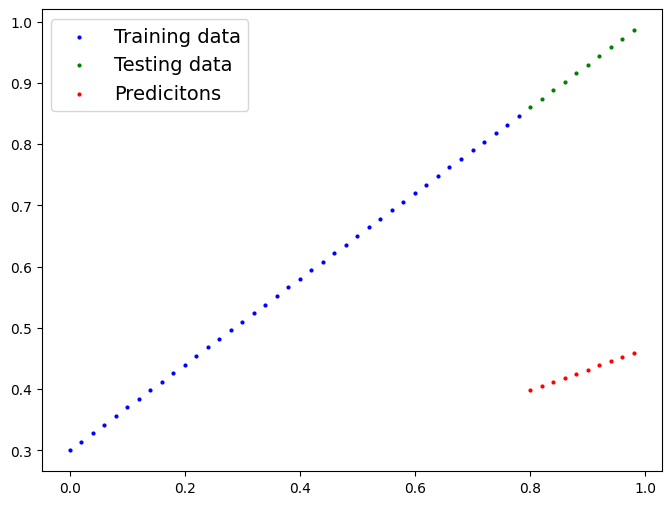

In [21]:
plot_predictions(predictions=y_preds)